In [1]:
# Implementation from https://github.com/dougalsutherland/opt-mmd

import sys, os
import numpy as np
from math import sqrt

CHANNEL_MEANS = (129.30402159690857/255, 124.06998485326767/255, 112.43405923247337/255)
CHANNEL_STDS = (68.17022681236267/255, 65.3918083012104/255, 70.41839897632599/255)

In [2]:
from scipy.spatial.distance import pdist, cdist

def energy_distance(v, w):
    VV = np.mean(pdist(v, 'euclidean'))
    WW = np.mean(pdist(w, 'euclidean'))
    VW = np.mean(cdist(v, w, 'euclidean'))
    
    return 2 * VW - VV - WW

In [3]:
from PIL import Image
from matplotlib import pyplot as plt

def display_sample(sample):
    img = sample.reshape((28, 28)) * 255.
    plt.imshow(Image.fromarray(img))
    plt.show()

In [4]:
# Add Bayesian-and-novelty directory to the PYTHONPATH
import sys
import os
sys.path.append(os.path.realpath('../../../..'))

# Autoreload changes in utils, etc.
%load_ext autoreload
%autoreload 2

import torch
from torchvision import datasets, transforms
import numpy as np
from functools import reduce

from novelty.utils.datasets import GaussianNoiseDataset
from novelty.utils.datasets import UniformNoiseDataset
from novelty.utils import DatasetSubset


torch.manual_seed(1)

# CIFAR100

In [5]:
def get_cifar100_test_data(cifar100_dir):
    """
    Return flattened and scaled CIFAR100 test data as a numpy array.
    
    Saves/loads dataset from cifar100_dir.
    """
    print("Loading CIFAR100 test")
    
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])
    
    dataset = datasets.CIFAR100(cifar100_dir, train=False, download=True, transform=transform)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0], reduce(lambda s, x: s * x, dataset.shape[1:], 1))

cifar100_test = get_cifar100_test_data('/media/tadenoud/DATADisk/datasets/cifar100/')

Loading CIFAR100 test
Files already downloaded and verified


In [6]:
def get_imagenet_crop_data(imagenet_dir):
    """
    Return cropped, flattened, and scaled TinyImageNet test data as a numpy array.
    
    Saves/loads dataset from imagenet_dir.
    """
    print("Loading ImageNet crop")
    
    transform_crop = transforms.Compose([
        transforms.RandomCrop([32, 32]),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])

    dataset = datasets.ImageFolder(imagenet_dir, transform=transform_crop)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0],  reduce(lambda s, x: s * x, dataset.shape[1:], 1))

imagenet_crop = get_imagenet_crop_data('/media/tadenoud/DATADisk/datasets/tiny-imagenet-200/test/')

imagenet_crop_energy = energy_distance(cifar100_test, imagenet_crop)
print("Imagenet (crop) Energy:", imagenet_crop_energy)

Loading ImageNet crop
Imagenet (crop) Energy: 1.4345950239127916


In [7]:
def get_imagenet_resize_data(imagenet_dir):
    """
    Return resized, flattened, and scaled TinyImageNet test data as a numpy array.
    
    Saves/loads dataset from imagenet_dir.
    """
    print("Loading ImageNet resize")
    
    transform_resize = transforms.Compose([
        transforms.Resize([32, 32]),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])

    dataset = datasets.ImageFolder(imagenet_dir, transform=transform_resize)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0],  reduce(lambda s, x: s * x, dataset.shape[1:], 1))

imagenet_resize = get_imagenet_resize_data('/media/tadenoud/DATADisk/datasets/tiny-imagenet-200/test/')

imagenet_resize_energy = energy_distance(cifar100_test, imagenet_resize)
print("Imagenet (resize) Energy:", imagenet_resize_energy)

Loading ImageNet resize
Imagenet (resize) Energy: 1.0456129479311187


In [8]:
def get_lsun_crop_data(lsun_dir):
    """
    Return cropped, flattened, and scaled LSUN test data as a numpy array.
    
    Saves/loads dataset from lsun_dir.
    """
    print("Loading LSUN crop")
    
    transform_crop = transforms.Compose([
        transforms.RandomCrop([32, 32]),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])
    
    dataset = datasets.LSUN(lsun_dir, classes='test', transform=transform_crop)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0],  reduce(lambda s, x: s * x, dataset.shape[1:], 1))

lsun_crop = get_lsun_crop_data('/media/tadenoud/DATADisk/datasets/lsun/')

lsun_crop_energy = energy_distance(cifar100_test, lsun_crop)
print("LSUN (crop) Energy:", lsun_crop_energy)

Loading LSUN crop
LSUN (crop) Energy: 1.734039819407684


In [9]:
def get_lsun_resize_data(lsun_dir):
    """
    Return resized, flattened, and scaled LSUN test data as a numpy array.
    
    Saves/loads dataset from lsun_dir.
    """
    print("Loading LSUN resize")
    
    transform_resize = transforms.Compose([
        transforms.Resize([32, 32]),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])
    
    dataset = datasets.LSUN(lsun_dir, classes='test', transform=transform_resize)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0],  reduce(lambda s, x: s * x, dataset.shape[1:], 1))

lsun_resize = get_lsun_resize_data('/media/tadenoud/DATADisk/datasets/lsun/')

lsun_resize_energy = energy_distance(cifar100_test, lsun_resize)
print("LSUN (resize) Energy:", lsun_resize_energy)

Loading LSUN resize
LSUN (resize) Energy: 1.6241822042619987


In [10]:
def get_isun_data(isun_dir):
    """
    Return flattened, and scaled iSUN test data as a numpy array.
    
    Saves/loads dataset from isun_dir.
    """
    print("Loading iSUN")
    
    transform_resize = transforms.Compose([
        transforms.Resize([32, 32]),
        transforms.ToTensor(),
        transforms.Normalize(CHANNEL_MEANS, CHANNEL_STDS)
    ])

    dataset = datasets.ImageFolder(isun_dir, transform=transform_resize)
    dataset = np.array([a[0].numpy() for a in dataset])
    dataset = dataset.astype('float32')
    return dataset.reshape(dataset.shape[0],  reduce(lambda s, x: s * x, dataset.shape[1:], 1))

isun_data = get_isun_data('/media/tadenoud/DATADisk/datasets/isun/')

isun_energy = energy_distance(cifar100_test, isun_data)
print("iSUN Energy:", isun_energy)

Loading iSUN
iSUN Energy: 1.1426799002968266


In [11]:
def get_gaussian_test_data():
    """Return flattened, and scaled Gaussian Noise test data as a numpy array."""
    print("Loading Gaussian Noise data")
    
    dataset = GaussianNoiseDataset((10000, 32*32*3), mean=0.0, std=1)
    dataset = np.array([a for a, _ in iter(dataset)])
    return dataset.astype('float32')

gaussianTestX = get_gaussian_test_data()

gaussian_energy = energy_distance(cifar100_test, gaussianTestX)
print("Gaussian Energy:", gaussian_energy)

Loading Gaussian Noise data
Gaussian Energy: 1.6758706026613197


In [12]:
import math

def get_uniform_test_data():
    """Return flattened, and scaled Uniform Noise test data as a numpy array."""
    print("Loading Uniform Noise data")
    
    dataset = UniformNoiseDataset((10000, 32*32*3), low=-math.sqrt(3), high=math.sqrt(3))
    dataset = np.array([a for a, _ in iter(dataset)])
    return dataset.astype('float32')

uniformTestX = get_uniform_test_data()

uniform_energy = energy_distance(cifar100_test, uniformTestX)
print("Uniform Energy:", uniform_energy)

Loading Uniform Noise data
Uniform Energy: 4.846891460410795


# CIFAR100 results

,energy
imagenet_resize,1.04561
isun_resize,1.14268
imagenet_crop,1.4346
lsun_resize,1.62418
gaussian,1.67587
lsun_crop,1.73404
uniform,4.84689


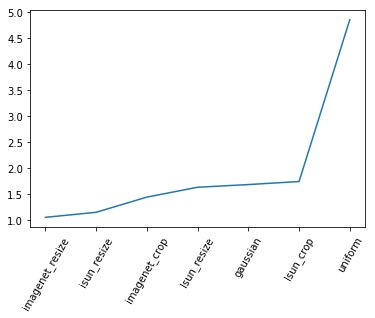

In [13]:
import pandas as pd
from IPython.display import display

df = pd.DataFrame(columns=['energy'],
                  index=['imagenet_crop', 'imagenet_resize', 'lsun_crop', 'lsun_resize', 
                         'isun_resize', 'gaussian', 'uniform'])

df.loc['imagenet_crop'] = pd.Series({'energy': imagenet_crop_energy})
df.loc['imagenet_resize'] = pd.Series({'energy': imagenet_resize_energy})
df.loc['lsun_crop'] = pd.Series({'energy': lsun_crop_energy})
df.loc['lsun_resize'] = pd.Series({'energy': lsun_resize_energy})
df.loc['isun_resize'] = pd.Series({'energy': isun_energy})
df.loc['gaussian'] = pd.Series({'energy': gaussian_energy})
df.loc['uniform'] = pd.Series({'energy': uniform_energy})

df = df.sort_values(by=['energy'])

display(df)

#plt.plot(df['energy'])
#plt.xticks(rotation=60)
#plt.show()

In [14]:
df.to_pickle('../results/cifar100_energy.pkl')